In [1]:
import numpy as np
from matplotlib import pyplot as plt
from keras import Sequential, Model
from keras.layers import Dense, Conv2D, BatchNormalization, Activation, Add, MaxPooling2D, UpSampling2D 

2024-07-09 04:39:16.640214: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-09 04:39:16.640373: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-09 04:39:16.845251: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
from keras.datasets import mnist

(X_train, _), (X_test, _) = mnist.load_data()
print(X_train.shape, X_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28) (10000, 28, 28)


In [3]:
X_train_norm = X_train / 255.0
X_test_norm = X_test / 255.0
X_train_norm[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [4]:
X_train_norm = X_train_norm.reshape(len(X_train), 28, 28, 1)
X_test_norm = X_test_norm.reshape(len(X_test), 28, 28, 1)
X_test_norm.shape

(10000, 28, 28, 1)

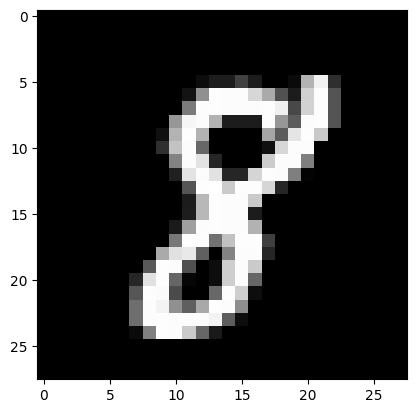

In [5]:
index = 97
plt.imshow(X_train_norm[index].reshape(28,28))
plt.gray()

In [6]:
import cv2

def blur_images(X):
    X_blur = list()
    for i in range(X.shape[0]):
        X_blur.append(cv2.GaussianBlur(X[i], (7,7), 0))
    return np.array(X_blur)

In [7]:
X_train_blur = blur_images(X_train_norm)
X_train_blur.shape

(60000, 28, 28)

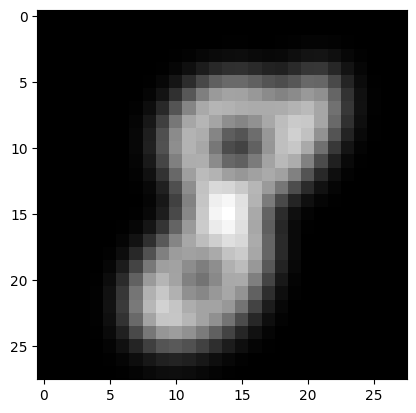

In [8]:
index = 97
plt.imshow(X_train_blur[index])
plt.gray()

In [9]:
X_test_blur = blur_images(X_test_norm)
X_test_blur.shape

(10000, 28, 28)

In [10]:
X_train_blur = X_train_blur.reshape(len(X_train_blur), 28, 28, 1)
X_test_blur = X_test_blur.reshape(len(X_test_blur), 28, 28, 1)
X_test_blur.shape

(10000, 28, 28, 1)

In [11]:
X_train_blur.shape, X_train_norm.shape

((60000, 28, 28, 1), (60000, 28, 28, 1))

In [12]:
X_test_blur.shape, X_test_norm.shape

((10000, 28, 28, 1), (10000, 28, 28, 1))

In [13]:
simple_AE = Sequential([
    Conv2D(32, 3, activation='relu', padding='same', input_shape=(28,28,1)),
    MaxPooling2D(2, padding='same'),
    Conv2D(16, 3, activation='relu', padding='same'),
    MaxPooling2D(2, padding='same'),
    Conv2D(16, 3, activation='relu', padding='same'),
    UpSampling2D(2),
    Conv2D(32, 3, activation='relu', padding='same'),
    UpSampling2D(2),
    Conv2D(1, 3, activation='sigmoid', padding='same'),  
])

simple_AE.compile(optimizer='adam', loss='binary_crossentropy')
simple_AE.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 16)       │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 1)      │           289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,193 (47.63 KB)

 Trainable params: 12,193 (47.63 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
history = simple_AE.fit(X_train_blur, X_train_norm, epochs=20, batch_size=256, validation_split=0.1)

Epoch 1/20
 27/211 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6418

I0000 00:00:1720499980.555320     108 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


211/211 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - loss: 0.3642 - val_loss: 0.1099
Epoch 2/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1011 - val_loss: 0.0895
Epoch 3/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0869 - val_loss: 0.0842
Epoch 4/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0827 - val_loss: 0.0815
Epoch 5/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0803 - val_loss: 0.0796
Epoch 6/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0786 - val_loss: 0.0782
Epoch 7/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0773 - val_loss: 0.0771
Epoch 8/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0764 - val_loss: 0.0762
Epoch 9/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0755 - val_loss: 0.0756
Epoch 10/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0749 - val_loss: 0.0749
Epoch 11/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0743 - val_loss: 0.0744
Epoch 12/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 

In [16]:
history.history.keys()

dict_keys(['loss', 'val_loss'])

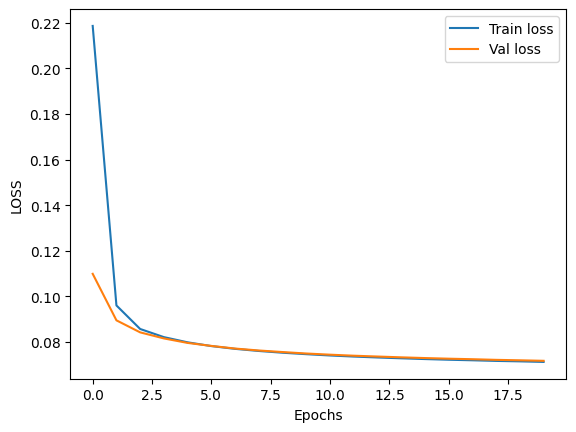

In [17]:
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Val loss')
plt.legend()
plt.ylabel("LOSS")
plt.xlabel("Epochs")
plt.show()

In [19]:
pred = simple_AE.predict(X_test_blur)
pred.shape

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


(10000, 28, 28, 1)

In [23]:
def plot_images(original, blurred, predicted, titles=None, figsize=(15, 5)):
    """
    Plots the original, blurred, and predicted images side by side.
    
    Parameters:
    - original: The original image.
    - blurred: The blurred version of the original image.
    - predicted: The predicted (deblurred) image.
    - titles: List of titles for the subplots. Default is ["Original", "Blurred", "Predicted"].
    - figsize: Size of the figure. Default is (15, 5).
    """
    if titles is None:
        titles = ["Original", "Blurred", "Predicted"]

    images = [original, blurred, predicted]

    plt.figure(figsize=figsize)
    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(1, 3, i + 1)
        if len(img.shape) == 2:  # Grayscale image
            plt.imshow(img, cmap='gray')
        else:  # RGB image
            plt.imshow(img)
        plt.title(title)
        plt.axis('off')
    plt.show()

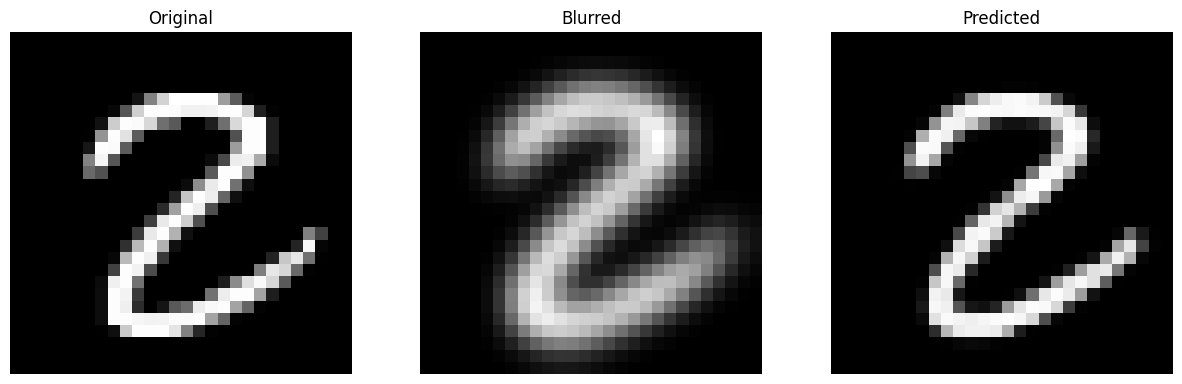

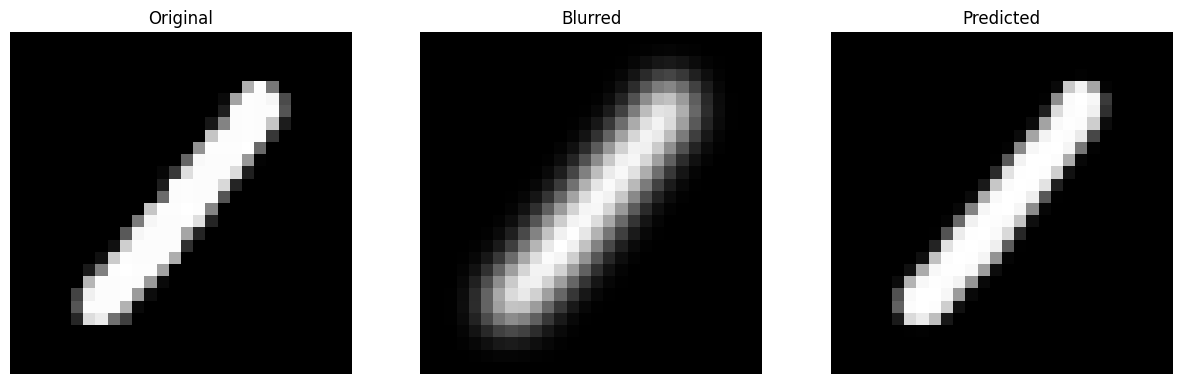

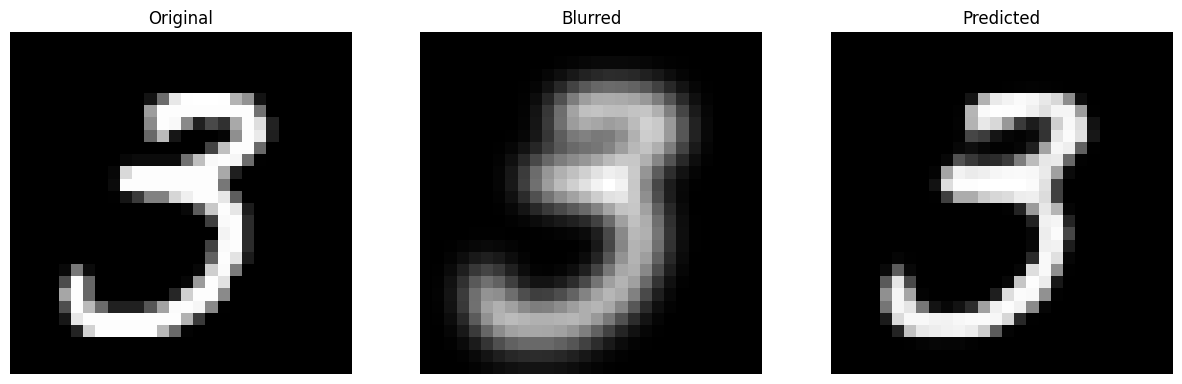

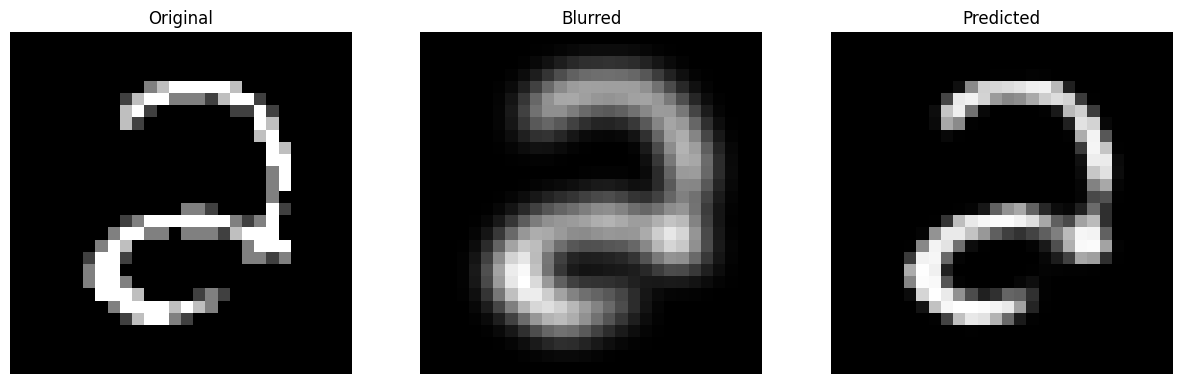

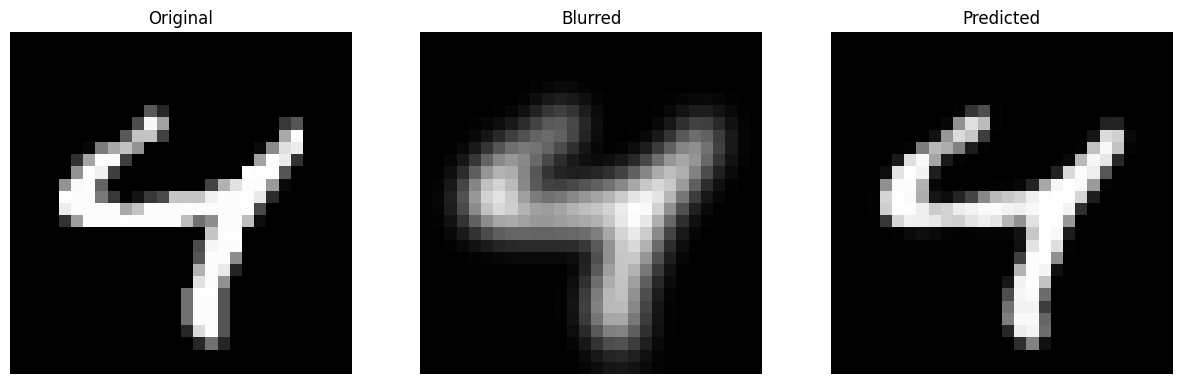

In [24]:
import random

random_indices = random.sample(range(X_test_norm.shape[0]), 5)
for index in random_indices:
    plot_images(X_test_norm[index].reshape(28,28),X_test_blur[index].reshape(28,28), pred[index].reshape(28,28))

In [25]:
def resnet_block(x, filters, strides=1):
    shortcut = x
    x = Conv2D(filters, 3, padding='same', strides=strides)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(filters, 3, padding='same')(x)
    x = BatchNormalization()(x)
    if strides != 1 or x.shape[-1] != shortcut.shape[-1]:
        shortcut = Conv2D(filters, 1, strides=strides, padding='same')(shortcut)
    x = Add()([x, shortcut])
    x = Activation('relu')(x)
    return x

In [28]:
from keras.layers import Input

In [35]:
def resnet_deblur(input_shape):
    inputs = Input(shape=input_shape)
    
    x = resnet_block(inputs, 32)
    x = MaxPooling2D((2, 2))(x)
    x = resnet_block(inputs, 16)
    x = MaxPooling2D((2, 2))(x)
    x = resnet_block(inputs, 16)
    x = UpSampling2D((2, 2))(x)
    x = resnet_block(inputs, 32)
    #x = UpSampling2D((2, 2))(x)
    outputs = Conv2D(1, 3, activation='sigmoid', padding='same')(x)
    
    return Model(inputs=inputs, outputs=outputs)

In [36]:
resNet = resnet_deblur((28, 28, 1))
resNet.compile(optimizer='adam', loss='binary_crossentropy')
resNet.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_40 (Conv2D)  │ (None, 28, 28,    │        320 │ input_layer_3[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 28, 28,    │        128 │ conv2d_40[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_22       │ (None, 28, 28,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_41 (Conv2D)  │ (None, 28, 28,    │      9,248 │ activation_22[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 28, 28,    │        128 │ conv2d_41[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_42 (Conv2D)  │ (None, 28, 28,    │         64 │ input_layer_3[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_11 (Add)        │ (None, 28, 28,    │          0 │ batch_normalizat… │
│                     │ 32)               │            │ conv2d_42[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_23       │ (None, 28, 28,    │          0 │ add_11[0][0]      │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_43 (Conv2D)  │ (None, 28, 28, 1) │        289 │ activation_23[0]… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 10,177 (39.75 KB)

 Trainable params: 10,049 (39.25 KB)

 Non-trainable params: 128 (512.00 B)

In [37]:
history2 = resNet.fit(X_train_blur, X_train_norm, epochs=20, batch_size=256, validation_split=0.1)

Epoch 1/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - loss: 0.1912 - val_loss: 0.3587
Epoch 2/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0694 - val_loss: 0.2050
Epoch 3/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0670 - val_loss: 0.0758
Epoch 4/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0659 - val_loss: 0.0662
Epoch 5/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0654 - val_loss: 0.0663
Epoch 6/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0646 - val_loss: 0.0664
Epoch 7/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0642 - val_loss: 0.0645
Epoch 8/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0639 - val_loss: 0.0652
Epoch 9/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0634 - val_loss: 0.0638
Epoch 10/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0631 - val_loss: 0.0638
Epoch 11/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0629 - val_loss: 0.0630
Epoch 12/20
211/211 ━━━━━━━━━━━━━━━━━━━━

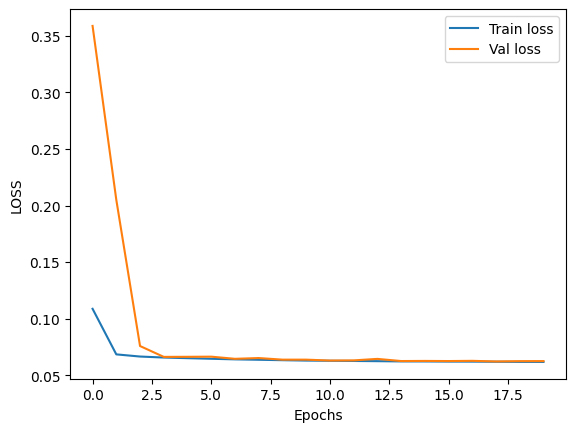

In [38]:
plt.plot(history2.history['loss'], label='Train loss')
plt.plot(history2.history['val_loss'], label='Val loss')
plt.legend()
plt.ylabel("LOSS")
plt.xlabel("Epochs")
plt.show()

In [39]:
pred2 = resNet.predict(X_test_blur)
pred2.shape

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


(10000, 28, 28, 1)

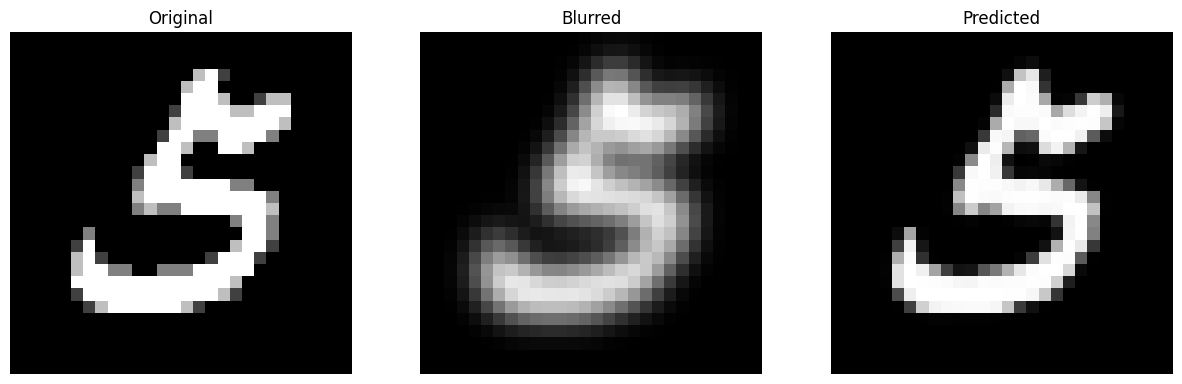

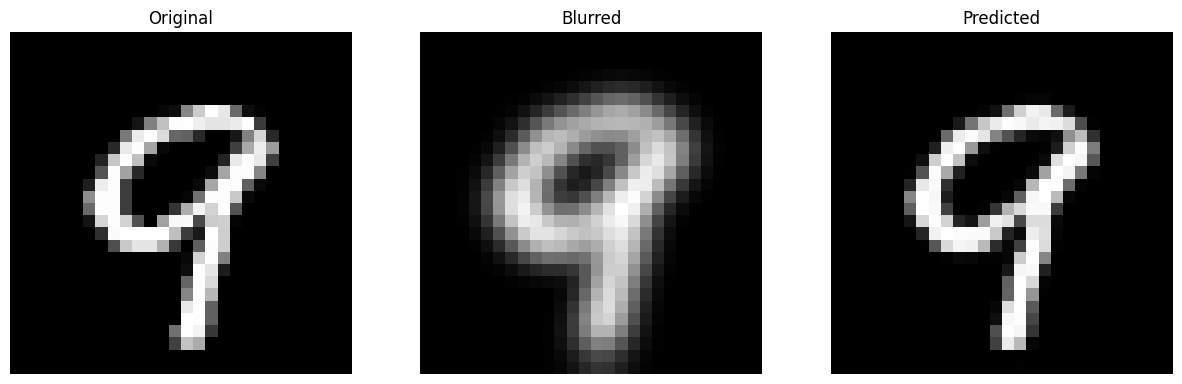

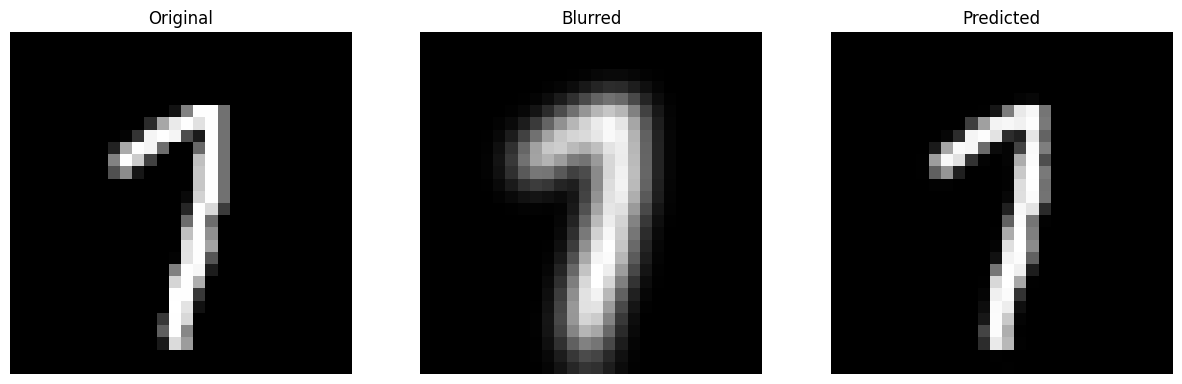

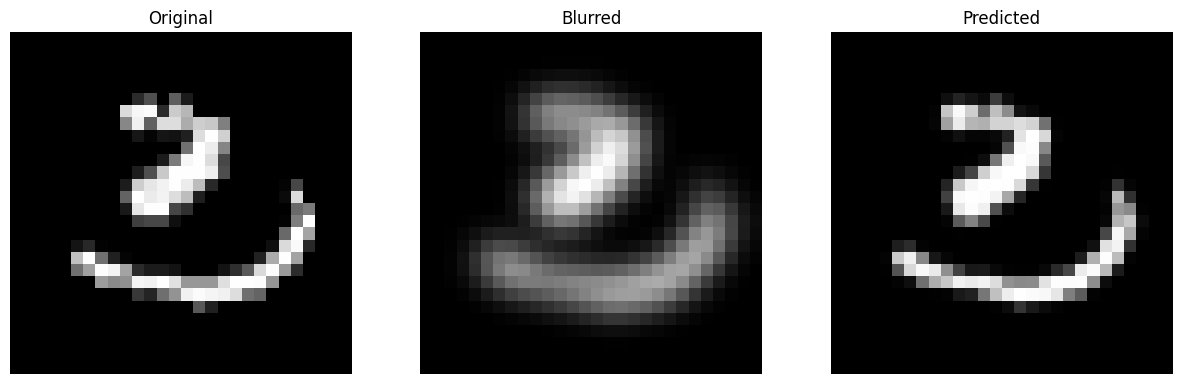

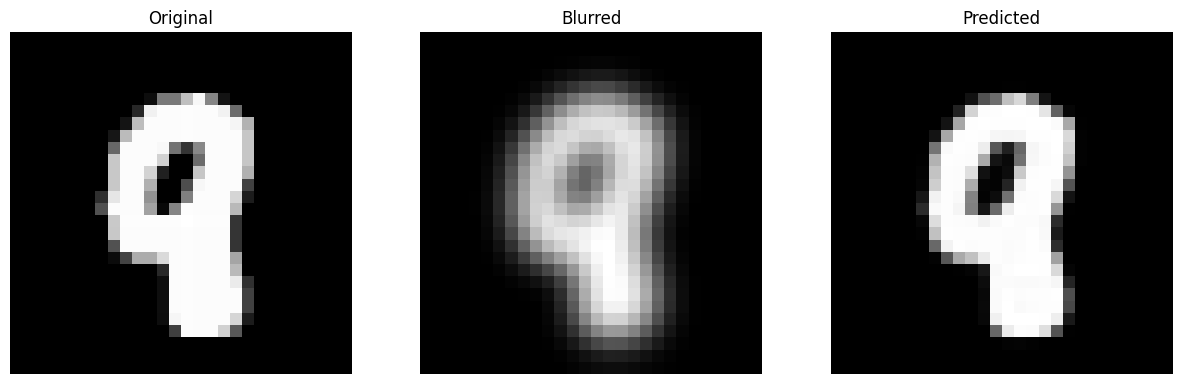

In [40]:
random_indices = random.sample(range(X_test_norm.shape[0]), 5)
for index in random_indices:
    plot_images(X_test_norm[index].reshape(28,28),X_test_blur[index].reshape(28,28), pred2[index].reshape(28,28))